# Projet d'analyse des résultats des détections des exoplanètes par le télescope Kepler

Source : This file was produced by the NASA Exoplanet Archive  http://exoplanetarchive.ipac.caltech.edu
Tue Jan 23 10:50:14 2024

### Objectif :
A partir de la validité des résultats de détection des exoplanètes par le télescope Kepler obtenir un modèle de prédiction de la probabilité d'avoir un exoplanète sur une planète Terrestre.

### Application RandomForest et validation croisée



In [17]:
import os
from datetime import datetime

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


import seaborn as sns

import matplotlib.pyplot as plt



In [18]:

# Charger ensemble de données ici (new_data par exemple)
new_data = pd.read_csv('./dataset/data_scaled.csv')
new_data.head()

,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_smet,koi_smet_err1,koi_smet_err2,koi_srad,...,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err,target
0,-1.455270,-1.069120,0.927458,0.761880,-0.680589,1.453036,-0.588642,-0.905873,1.041867,-0.191314,...,-0.343219,-0.505704,-0.383257,-0.182823,-0.322156,-0.141307,-0.306647,-0.366621,-0.359074,1
1,-0.377464,1.112379,-0.282871,-1.678647,5.738445,-0.885670,0.231629,1.066159,-0.682560,0.270923,...,-0.615991,4.449231,-0.541723,-6.182493,-0.521934,1.843847,-0.597611,4.450570,-0.557946,0
2,0.430269,1.090992,-0.789520,0.259121,-0.353087,-1.050905,0.231629,0.408815,-0.682560,-0.112239,...,0.491383,-0.405555,0.992442,0.061789,1.065191,-0.128900,0.530662,-0.425199,0.820082,1
3,-1.456515,-1.047733,0.913384,0.827567,-0.844339,1.173408,0.082489,-0.905873,1.041867,-0.192142,...,-0.221082,-0.533331,0.330714,0.257479,0.658236,-0.066864,-0.201983,-0.352838,0.344900,1
4,0.212468,-0.726925,0.702281,-0.016259,0.334667,0.385366,-0.663213,-0.905873,1.041867,-0.102717,...,0.511739,-0.381381,0.295886,0.177424,0.473256,0.086158,0.760921,-0.428645,0.309701,1


In [19]:
# Séparation des caractéristiques (X) et de la cible (y)
X = new_data.drop('target', axis=1)
y = new_data['target']

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Les modèles

chargement du modèle

In [20]:

model = RandomForestClassifier(random_state=42) 
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


Application de la validation croisée

In [21]:

scores = cross_val_score(model, X_train, y_train, cv=k_fold, scoring='accuracy')

#### Evaluation

In [22]:

# Affichez les résultats
print(f'Moyenne de l\'accuracy sur les folds : {np.mean(scores):.2f}')
print(f'Écart-type de l\'accuracy sur les folds : {np.std(scores):.2f}')


Moyenne de l'accuracy sur les folds : 0.95
Écart-type de l'accuracy sur les folds : 0.01


In [23]:
# Prédictions avec validation croisée
y_pred = cross_val_predict(model, X_test, y_test, cv=k_fold)


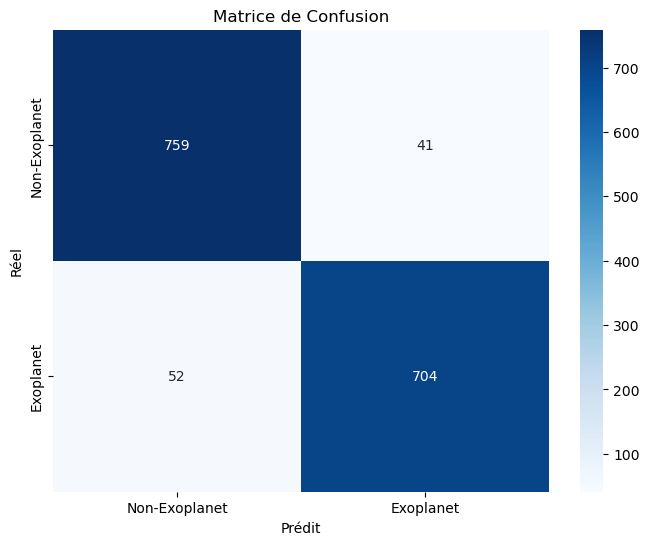

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       800
           1       0.94      0.93      0.94       756

    accuracy                           0.94      1556
   macro avg       0.94      0.94      0.94      1556
weighted avg       0.94      0.94      0.94      1556



In [24]:

# Afficher la matrice de confusion
# Affichage de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
# Afficher la matrice de confusion avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Exoplanet', 'Exoplanet'],
            yticklabels=['Non-Exoplanet', 'Exoplanet'])
plt.title('Matrice de Confusion')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()


# Affichage du rapport de classification
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

### Résultats :

équivalents à CNN 